 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [117]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [82]:
# Reading whale returns
df_whale = pd.read_csv("Resources/whale_returns.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)

# Sort the values in descending order to put most recent returns first
# I can sort the data frame in descending while reading it in but I find this is cleaner and more readable
df_whale = df_whale.sort_index(ascending=False)

In [83]:
# I like to get a look at the data to see what I'm working with
df_whale.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702
2019-04-29,0.001254,0.002719,0.006251,0.005223
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848


In [14]:
# and to see the data types of columns
df_whale.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [21]:
# Count nulls
df_whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [23]:
# Drop nulls
df_whale = df_whale.dropna().copy()

In [24]:
# check that nulls have been dropped
df_whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [89]:
# Reading algorithmic returns
df_algo = pd.read_csv("Resources/algo_returns.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)

# Sort the values in descending order to put most recent returns first
# I can sort the data frame in descending while reading it in but I find this is cleaner and more readable
df_algo = df_algo.sort_index(ascending=False)

In [90]:
# I like to get a look at the data to see what I'm working with
df_algo.head()

,Algo 1,Algo 2
Date,,
2019-05-01,0.000094,-0.007358
2019-04-30,-0.002944,-0.001570
2019-04-29,0.005208,0.002829
2019-04-26,0.002981,0.005256
2019-04-25,0.000682,-0.007247


In [18]:
# and to see the data types of columns
df_algo.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

In [22]:
# Count nulls
df_algo.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [26]:
# Drop nulls
df_algo = df_algo.dropna().copy()

In [27]:
# check that nulls have been dropped
df_algo.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [91]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_hist = pd.read_csv("Resources/sp_tsx_history.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)

# Sort the values in descending order to put most recent returns first
# I can sort the data frame in descending while reading it in but I find this is cleaner and more readable
sp_tsx_hist = sp_tsx_hist.sort_index(ascending=False)

In [92]:
# I like to get a look at the data to see what I'm working with and check all is working as expected
sp_tsx_hist.head()

,Close
Date,
2019-12-30,"$17,098.56"
2019-12-27,"$17,168.21"
2019-12-24,"$17,180.15"
2019-12-23,"$17,128.71"
2019-12-20,"$17,118.44"


In [56]:
# Check Data Types
sp_tsx_hist.dtypes

Close    object
dtype: object

In [57]:

# Fix Data Types


In [66]:
# First I need to remove the '$' symbol from the series
sp_tsx_hist["Close"] = sp_tsx_hist["Close"].str.replace("$", "", regex=True)
sp_tsx_hist.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [67]:
# And to remove the ',' (comma) from the series
sp_tsx_hist["Close"] = sp_tsx_hist["Close"].str.replace(",", "", regex=True)
sp_tsx_hist.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [76]:
#Now I can convert the data type of the "Close" column from object to float

sp_tsx_hist["Close"] = sp_tsx_hist["Close"].astype('float')

# And to confirm data conversion has worked as expected

sp_tsx_hist.dtypes

KeyError: 'Close'

In [69]:
# Calculate Daily Returns
 # Calculate the daily return using the 'pct_change()' function
sp_tsx_hist["Close"] = sp_tsx_hist.pct_change()
sp_tsx_hist.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [73]:
# Count how many nulls there are in the DataFrame

sp_tsx_hist.isnull().sum()

Close    0
dtype: int64

In [74]:
# Drop nulls

sp_tsx_hist = sp_tsx_hist.dropna().copy()
sp_tsx_hist.isnull().sum()

Close    0
dtype: int64

In [78]:
# Rename `Close` Column to be specific to this portfolio.

sp_tsx_hist.rename(columns = {"Close":"S&P TSX"}, inplace=True)
sp_tsx_hist.head()

,SP_TSX_DAILY_RETURNS
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [77]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
joined_daily_returns = pd.concat([df_whale, df_algo, sp_tsx_hist ], axis='columns', join='inner')

# Take a look at my final data frame

joined_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_TSX_DAILY_RETURNS
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

Text(0.5, 1.0, 'Daily % return of Portfolios')

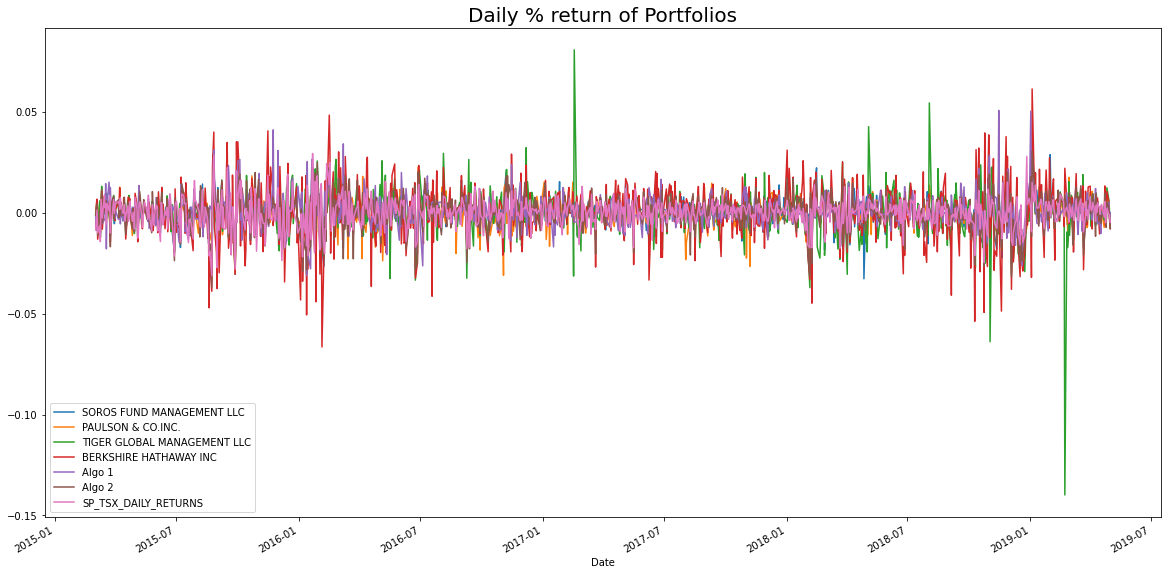

In [119]:
# Plot daily returns of all portfolios
returns_plt = joined_daily_returns.plot(figsize=(20,10),legend=True)
plt.title('Daily Returns of Portfolios', fontsize=20, color='black')


#### Calculate and Plot cumulative returns.

In [125]:
# Calculate cumulative returns of all portfolios

cumulative_returns = (1 + joined_daily_returns).cumprod() -1
cumulative_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_TSX_DAILY_RETURNS
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.010514,0.001464,-0.011872
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.011459,0.005794,-0.010544
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.016359,-0.005733,-0.020411
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466,-0.021717,-0.004437,-0.026832


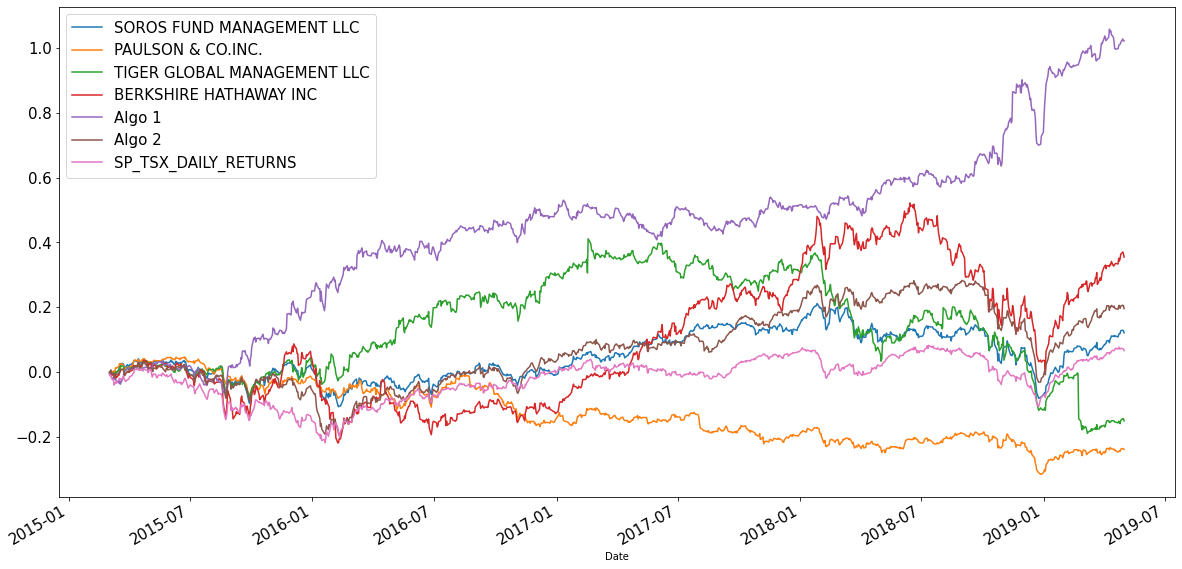

In [135]:
# Plot cumulative returns
cumu_plot = cumulative_returns.plot(figsize=(20,10), fontsize=15)
cumu_plot.legend(fontsize=15)

It is clear from the plot above that 4 portfolios outperform the S&P:
* Algo 1
* Algo 2
* Berkshire Hathaway INC
* Soros Fund Management LLC

Algo 1 has the most outstanding results of all portfolios.

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

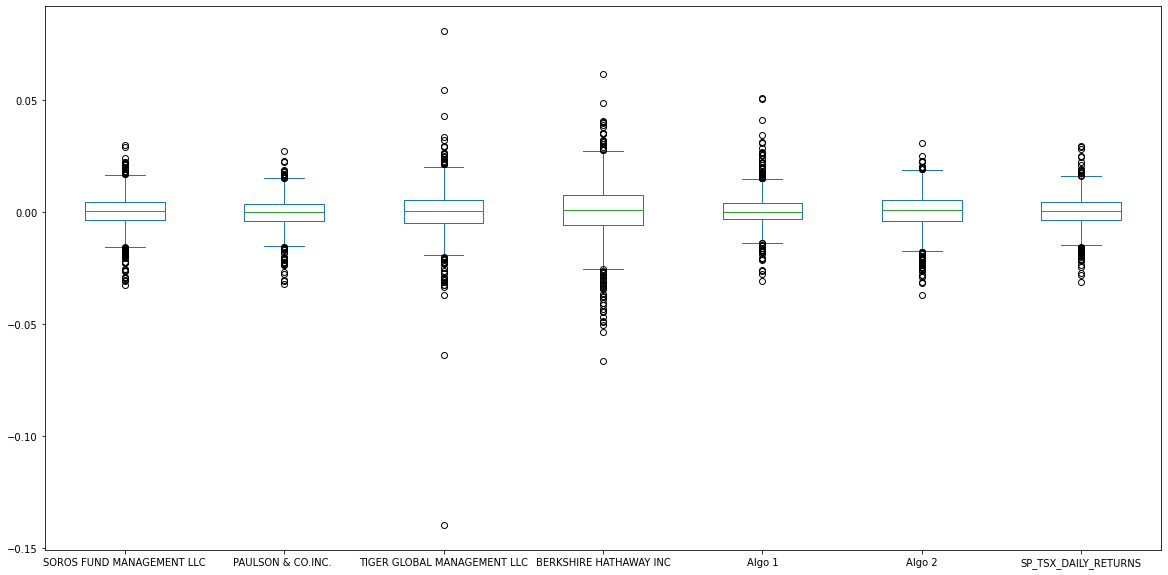

In [110]:
# Box plot to visually show risk

# The labels of each portfolio ran together in some cases so I increased the figure size on the x-axis to ensure readability
joined_daily_returns.plot.box(fontsize=10, figsize=(20,10))

### Calculate Standard Deviations

In [95]:
# Calculate the daily standard deviations of all portfolios
daily_std = joined_daily_returns.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
SP_TSX_DAILY_RETURNS           0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [137]:
# Calculate  the daily standard deviation of S&P TSX 60
s_p_std = joined_daily_returns["SP_TSX_DAILY_RETURNS"].std()
s_p_std



PAULSON & CO.INC.     0.006982
dtype: float64


#### Determine which portfolios are riskier than the S&P TSX 60


In [ ]:
# If I sort the standard deviation of all portfolios in descending order 
# we can see the relative risk for all portfolios
daily_std = daily_std.sort_values(ascending=False)
daily_std

In [ ]:
# Which portfolios have less risk than the S&P TSX
daily_std[(daily_std < daily_std["SP_TSX_DAILY_RETURNS"])]

In [ ]:
# And finally which portfolios are riskier than the S&P TSX 60

daily_std[(daily_std > daily_std["SP_TSX_DAILY_RETURNS"])]

### Calculate the Annualized Standard Deviation

In [100]:
# Calculate the annualized standard deviation (252 trading days)

annualized_std = daily_std * np.sqrt(252)
annualized_std

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
SP_TSX_DAILY_RETURNS           0.111664
PAULSON & CO.INC.              0.110841
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [ ]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate the correlation

# Display de correlation matrix


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [ ]:
# Calculate covariance of a single portfolio

# Calculate variance of S&P TSX

# Computing beta

# Plot beta trend


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [ ]:
# Reading data from 1st stock


In [ ]:
# Reading data from 2nd stock


In [ ]:
# Reading data from 3rd stock


In [ ]:
# Combine all stocks in a single DataFrame


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!